In [21]:
import pandas as pd
import numpy as np 
from datetime import datetime
import re


from CaptureData import VaduApi, VaduCrawler 

In [2]:
df_ = pd.read_csv('Base_90%pronta.csv', index_col= 0)

df = pd.read_excel('../Novos Dados.xlsx')
df['BUSCA'] = df['CNPJ']
df.loc[df['CNPJ'].isnull(), 'BUSCA'] = df[df['CNPJ'].isnull()]['Razão social']
df['BUSCA'] = df['BUSCA'].apply(lambda x: re.sub(r'[^\w\s]','',x))
df = df[['BUSCA','Unnamed: 6']].merge(df_)
df = df.drop_duplicates().reset_index(drop = True)

df = df.rename({'Classificação':'result'}, axis='columns')
df['result'] = df['result'].replace({'Positivo':1, 'Negativo':0})

In [3]:
df

,BUSCA,Unnamed: 6,CnpjCpf,Nome,UfEndereco,ReceitaSituacao,ReceitaAbertura,ReceitaNaturezaJuridica,ReceitaSituacaoEspecial,ReceitaCapitalSocial,OpcaoTributaria,Porte,ReceitaAtividade,cnpj,Faturamento,Funcionarios,TotalProtesto,ValorProtesto,result,Última alteração de etapa
0,G DA SILVA CALCADOS EIRELI,2019-12-02 12:47:56,12.289.084/0001-04,G. DA SILVA CALCADOS - EIRELI,RS,ATIVA,2010-07-27T00:00:00.000,230-5 - Empresa Individual de Responsabilidade...,NaN,95400.00,NaN,DEMAIS,15.31-9/01 Fabricação de calçados de couro\r\n,12.289.084/0001-04,de 4.800.000 até 10.000.000,acima de 500,674,"1.561.585,31",1.0,2019-07-16 14:45:24
1,19211781000191,2019-10-22 17:01:33,19.211.781/0001-91,INDUSTRIA DE PALMILHAS NINIVER EIRELI,RS,ATIVA,2013-10-24T00:00:00.000,230-5 - Empresa Individual de Responsabilidade...,NaN,350000.00,SIMPLES NACIONAL,DEMAIS,"15.40-8/00 Fabricação de partes para calçados,...",19.211.781/0001-91,de 1.500.000 até 4.800.000,de 10 até 50,95,"427.011,82",1.0,2019-08-16 18:02:10
2,01978934000165,2019-12-02 12:35:16,01.978.934/0001-65,POLYMER INDUSTRIA E COMERCIO DE PLASTICOS EIRELI,RS,ATIVA,1997-07-17T00:00:00.000,230-5 - Empresa Individual de Responsabilidade...,NaN,200000.00,NaN,ME,22.29-3/01 Fabricação de artefatos de material...,01.978.934/0001-65,de 81.000 até 360.000,de 10 até 50,44,"2.241.679,36",1.0,NaN
3,30866312000143,2019-09-24 17:41:50,30.866.312/0001-43,FEX COMERCIO DE FERRO EIRELI,PR,ATIVA,2018-07-05T00:00:00.000,230-5 - Empresa Individual de Responsabilidade...,NaN,100000.00,NaN,ME,47.44-0/01 Comércio varejista de ferragens e f...,30.866.312/0001-43,de 81.000 até 360.000,de 10 até 50,0,-,1.0,NaN
4,06337280000457,2020-01-03 17:44:42,06.337.280/0004-57,FRESNOMAQ INDUSTRIA DE MAQUINAS S/A,PR,ATIVA,2012-02-10T00:00:00.000,205-4 - Sociedade Anônima Fechada,NaN,6702900.00,LUCRO REAL,DEMAIS,46.49-4/01 Comércio atacadista de equipamentos...,06.337.280/0004-57,de 100.000.000 até 300.000.000,de 10 até 50,1,"5.069,19",0.0,2019-08-21 18:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,87455432000175,2019-09-24 17:41:50,87.455.432/0001-75,COOPERATIVA SUL RIO GRANDENSE DE LATICINIOS LT...,RS,ATIVA,1973-10-04T00:00:00.000,214-3 - Cooperativa,NaN,NaN,LUCRO REAL,DEMAIS,10.52-0/00 Fabricação de laticínios\r\n,87.455.432/0001-75,NaN,NaN,1413,"6.975.885,19",0.0,2017-08-22 20:12:35
1646,73367575000110,2019-09-24 17:41:50,73.367.575/0001-10,THOMAS KL INDUSTRIA DE ALTO FALANTES SA,RS,ATIVA,1993-09-17T00:00:00.000,205-4 - Sociedade Anônima Fechada,NaN,33418134.97,LUCRO REAL,DEMAIS,26.40-0/00 Fabricação de aparelhos de recepção...,73.367.575/0001-10,NaN,NaN,0,-,0.0,2017-08-22 20:43:55
1647,03591919000195,2019-09-24 17:41:50,03.591.919/0001-95,"DI CANALLI COMERCIO, TRANSPORTES E EMPREENDIME...",RS,ATIVA,2000-01-13T00:00:00.000,206-2 - Sociedade Empresária Limitada,NaN,1605215.00,LUCRO REAL,DEMAIS,"49.30-2/02 Transporte rodoviário de carga, exc...",03.591.919/0001-95,NaN,NaN,27,"248.716,66",1.0,2017-08-30 16:39:30
1648,11619817000169,2019-09-24 17:41:50,11.619.817/0001-69,COMERCIO DE CARNES SELBACH LTDA,RS,BAIXADA,2010-01-20T00:00:00.000,206-2 - Sociedade Empresária Limitada,NaN,300000.00,NaN,DEMAIS,NaN,11.619.817/0001-69,NaN,NaN,245,"4.648.997,75",0.0,2017-08-30 17:31:43


In [4]:
df = df.drop(columns = ['Última alteração de etapa'])
df = df.rename({'Unnamed: 6': 'data_consulta'}, axis = 'columns')

In [5]:
df

,BUSCA,data_consulta,CnpjCpf,Nome,UfEndereco,ReceitaSituacao,ReceitaAbertura,ReceitaNaturezaJuridica,ReceitaSituacaoEspecial,ReceitaCapitalSocial,OpcaoTributaria,Porte,ReceitaAtividade,cnpj,Faturamento,Funcionarios,TotalProtesto,ValorProtesto,result
0,G DA SILVA CALCADOS EIRELI,2019-12-02 12:47:56,12.289.084/0001-04,G. DA SILVA CALCADOS - EIRELI,RS,ATIVA,2010-07-27T00:00:00.000,230-5 - Empresa Individual de Responsabilidade...,NaN,95400.00,NaN,DEMAIS,15.31-9/01 Fabricação de calçados de couro\r\n,12.289.084/0001-04,de 4.800.000 até 10.000.000,acima de 500,674,"1.561.585,31",1.0
1,19211781000191,2019-10-22 17:01:33,19.211.781/0001-91,INDUSTRIA DE PALMILHAS NINIVER EIRELI,RS,ATIVA,2013-10-24T00:00:00.000,230-5 - Empresa Individual de Responsabilidade...,NaN,350000.00,SIMPLES NACIONAL,DEMAIS,"15.40-8/00 Fabricação de partes para calçados,...",19.211.781/0001-91,de 1.500.000 até 4.800.000,de 10 até 50,95,"427.011,82",1.0
2,01978934000165,2019-12-02 12:35:16,01.978.934/0001-65,POLYMER INDUSTRIA E COMERCIO DE PLASTICOS EIRELI,RS,ATIVA,1997-07-17T00:00:00.000,230-5 - Empresa Individual de Responsabilidade...,NaN,200000.00,NaN,ME,22.29-3/01 Fabricação de artefatos de material...,01.978.934/0001-65,de 81.000 até 360.000,de 10 até 50,44,"2.241.679,36",1.0
3,30866312000143,2019-09-24 17:41:50,30.866.312/0001-43,FEX COMERCIO DE FERRO EIRELI,PR,ATIVA,2018-07-05T00:00:00.000,230-5 - Empresa Individual de Responsabilidade...,NaN,100000.00,NaN,ME,47.44-0/01 Comércio varejista de ferragens e f...,30.866.312/0001-43,de 81.000 até 360.000,de 10 até 50,0,-,1.0
4,06337280000457,2020-01-03 17:44:42,06.337.280/0004-57,FRESNOMAQ INDUSTRIA DE MAQUINAS S/A,PR,ATIVA,2012-02-10T00:00:00.000,205-4 - Sociedade Anônima Fechada,NaN,6702900.00,LUCRO REAL,DEMAIS,46.49-4/01 Comércio atacadista de equipamentos...,06.337.280/0004-57,de 100.000.000 até 300.000.000,de 10 até 50,1,"5.069,19",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,87455432000175,2019-09-24 17:41:50,87.455.432/0001-75,COOPERATIVA SUL RIO GRANDENSE DE LATICINIOS LT...,RS,ATIVA,1973-10-04T00:00:00.000,214-3 - Cooperativa,NaN,NaN,LUCRO REAL,DEMAIS,10.52-0/00 Fabricação de laticínios\r\n,87.455.432/0001-75,NaN,NaN,1413,"6.975.885,19",0.0
1646,73367575000110,2019-09-24 17:41:50,73.367.575/0001-10,THOMAS KL INDUSTRIA DE ALTO FALANTES SA,RS,ATIVA,1993-09-17T00:00:00.000,205-4 - Sociedade Anônima Fechada,NaN,33418134.97,LUCRO REAL,DEMAIS,26.40-0/00 Fabricação de aparelhos de recepção...,73.367.575/0001-10,NaN,NaN,0,-,0.0
1647,03591919000195,2019-09-24 17:41:50,03.591.919/0001-95,"DI CANALLI COMERCIO, TRANSPORTES E EMPREENDIME...",RS,ATIVA,2000-01-13T00:00:00.000,206-2 - Sociedade Empresária Limitada,NaN,1605215.00,LUCRO REAL,DEMAIS,"49.30-2/02 Transporte rodoviário de carga, exc...",03.591.919/0001-95,NaN,NaN,27,"248.716,66",1.0
1648,11619817000169,2019-09-24 17:41:50,11.619.817/0001-69,COMERCIO DE CARNES SELBACH LTDA,RS,BAIXADA,2010-01-20T00:00:00.000,206-2 - Sociedade Empresária Limitada,NaN,300000.00,NaN,DEMAIS,NaN,11.619.817/0001-69,NaN,NaN,245,"4.648.997,75",0.0


In [6]:
1650 - 1519

131

In [7]:
ids_drop = set()

for cnpj_aux in df[df['cnpj'].duplicated()]['cnpj'].unique():
    aux_df = df[df['cnpj'] == cnpj_aux]
    aux_df['total_null'] = aux_df.isna().T.sum()
    for i in aux_df.sort_values(["total_null", 'result', "data_consulta"], ascending = ( False, True, True)).iloc[1:].index:
        ids_drop.add(i)

<ipython-input-7-5c7d37c1cc4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_df['total_null'] = aux_df.isna().T.sum()


In [8]:
df = df.drop(index = list(ids_drop)).reset_index(drop = True)

In [9]:
df['result'].value_counts()

0.0    1089
1.0     430
Name: result, dtype: int64

In [10]:
df['cnpj'] = df['cnpj'].apply(lambda s: re.sub(r'[^\w\s]','',s))

In [11]:
LISTA_UfEndereco = ['RS', 'SC', 'PR', 'SP', 'RJ', 'MG']
LISTA_ReceitaSituacao = ['ATIVA']
TEMPO_ReceitaAbertura = 3
LISTA_ReceitaNaturezaJuridica = ['203-8 - Sociedade de Economia Mista', '204-6 - Sociedade Anônima Aberta', '205-4 - Sociedade Anônima Fechada', '206-2 - Sociedade Empresária Limitada', '208-9 - Sociedade Empresária em Comandita Simples', '209-7 - Sociedade Empresária em Comandita por Ações', '230-5 - Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)', '231-3 - Empresa Individual de Responsabilidade Limitada (de Natureza Simples)']
LISTA_ReceitaSituacaoEspecial = ['RECUPERACAO JUDICIAL']
VALOR_ReceitaCapitalSocial = 10000
LISTA_OpcaoTributaria = ['SIMEI','SIMPLES NACIONAL']
LISTA_Porte = ['MEI','ME']
LISTA_ReceitaAtividade = ['K', 'M', 'O', 'U']



In [121]:
def filter_UfEndereco(df):
    return df[df['UfEndereco'].isin(LISTA_UfEndereco)].reset_index(drop = True)
    
    
def filter_ReceitaSituacao(df):
    return df[df['ReceitaSituacao'].isin(LISTA_ReceitaSituacao)].reset_index(drop = True)


def filter_ReceitaAbertura(df):
    df['diff_date'] = pd.to_datetime(df['ReceitaAbertura']).apply(lambda x: datetime.now().date().year - x.year)
    df = df[df['diff_date'] >= TEMPO_ReceitaAbertura].reset_index(drop = True)
    return df.drop(columns = ['diff_date'])
    

def filter_ReceitaNaturezaJuridica(df):
    return df[df['ReceitaNaturezaJuridica'].isin(LISTA_ReceitaNaturezaJuridica)].reset_index(drop = True)


def filter_ReceitaSituacaoEspecial(df):
    return df[(df['ReceitaSituacaoEspecial'].isnull()) |\
              (df['ReceitaSituacaoEspecial'].isin(LISTA_ReceitaSituacaoEspecial))].reset_index(drop = True)


def filter_ReceitaCapitalSocial(df):
    return df[df['ReceitaCapitalSocial']>=VALOR_ReceitaCapitalSocial].reset_index(drop = True)


def filter_OpcaoTributaria(df):
    return df[~(df['OpcaoTributaria'].isin(LISTA_OpcaoTributaria))].reset_index(drop = True)


def filter_Porte(df):
    return df[~(df['Porte'].isin(LISTA_Porte))].reset_index(drop = True)


def filter_ReceitaAtividade(df):
    def check_cnae_setor(x):
        CNAE_SETORES = {'A':(1,3),'B':(5,9),'C':(10,33),
                        'D':(35,35),'E':(36,39),'F':(41,43),
                        'G':(45,47),'H':(49,53),'I':(55,56),
                        'J':(58,63),'K':(64,66),'L':(68,68),
                        'M':(69,75),'N':(77,82),'O':(84,84),
                        'P':(85,85),'Q':(86,88),'R':(90,93),
                        'S':(94,96),'T':(97,97),'U':(99,99)}


        try:
            setor = int(re.split(r'[^\w\s]',x)[0])
            for i in LISTA_ReceitaAtividade:
                if setor >= CNAE_SETORES[i][0] and  setor <= CNAE_SETORES[i][1]:
                    return False
            return True
        except:
            return True

    return df[df['ReceitaAtividade'].apply(check_cnae_setor)].reset_index(drop = True)


In [12]:
df['ReceitaSituacao'].value_counts()

ATIVA                                      1273
BAIXADA                                     158
INAPTA                                       85
ATIVA - EMPRESA DOMICILIADA NO EXTERIOR       5
SUSPENSA                                      2
NULA                                          1
Name: ReceitaSituacao, dtype: int64

In [13]:
df.columns

Index(['BUSCA', 'data_consulta', 'CnpjCpf', 'Nome', 'UfEndereco',
       'ReceitaSituacao', 'ReceitaAbertura', 'ReceitaNaturezaJuridica',
       'ReceitaSituacaoEspecial', 'ReceitaCapitalSocial', 'OpcaoTributaria',
       'Porte', 'ReceitaAtividade', 'cnpj', 'Faturamento', 'Funcionarios',
       'TotalProtesto', 'ValorProtesto', 'result'],
      dtype='object')

In [14]:
df = df.rename(columns = {'faturamento':'Faturamento', 'funcionarios':'Funcionarios', 'total_protesto':'TotalProtesto',
       'valor_protesto':'ValorProtesto'})
df = df.drop(columns = 'CnpjCpf')
df = df.drop(columns = 'data_consulta') 

In [12]:
# df.to_csv('Base_Train.csv')

In [10]:
# df = pd.read_csv('Base_Train.csv', index_col = 0)

In [11]:
print(len(df))
df = filter_UfEndereco(df)
print(len(df))
df = filter_ReceitaSituacao(df)
print(len(df))
df = filter_ReceitaAbertura(df)
print(len(df))
df = filter_ReceitaNaturezaJuridica(df)
print(len(df))
df = filter_ReceitaSituacaoEspecial(df)
print(len(df))
df = filter_ReceitaCapitalSocial(df)
print(len(df))
df = filter_OpcaoTributaria(df)
print(len(df))
df = filter_Porte(df)
print(len(df))
df = filter_ReceitaAtividade(df)
print(len(df))

1524
1426
1252
1249
1217
1214
1160
1048
982
972


In [15]:
df['result'].value_counts()

0.0    1089
1.0     430
Name: result, dtype: int64

In [16]:
df['ReceitaAtividade']

0       15.40-8/00 Fabricação de partes para calçados,...
1       22.29-3/01 Fabricação de artefatos de material...
2       47.44-0/01 Comércio varejista de ferragens e f...
3       46.49-4/01 Comércio atacadista de equipamentos...
4       45.30-7/01 Comércio por atacado de peças e ace...
                              ...                        
1519              10.52-0/00 Fabricação de laticínios\r\n
1520    26.40-0/00 Fabricação de aparelhos de recepção...
1521    49.30-2/02 Transporte rodoviário de carga, exc...
1522                                                  NaN
1523         85.31-7/00 Educação superior - graduação\r\n
Name: ReceitaAtividade, Length: 1524, dtype: object

In [17]:
df['Faturamento'] = df['Faturamento'].replace( { 'de 0 até 81.000':1,
                                                 'de 81.000 até 360.000':2, 
                                                 'de 360.000 até 1.500.000':3,
                                                 'de 1.500.000 até 4.800.000':4,
                                                 'de 4.800.000 até 10.000.000':5,
                                                 'de 10.000.000 até 30.000.000':6, 
                                                 'de 30.000.000 até 100.000.000':7, 
                                                 'de 100.000.000 até 300.000.000':8,
                                                 'de 300.000.000 até 500.000.000':9, 
                                                 'de 500.000.000 até 1.000.000.000':10,
                                                 'acima de 1.000.000.000':11 })

In [18]:
df['Funcionarios'] = df['Funcionarios'].replace( { 'de 0 até 5':1,
                                                   'de 5 até 10':2, 
                                                   'de 10 até 50':3, 
                                                   'de 50 até 100':4,
                                                   'de 100 até 500':5,
                                                   'acima de 500':6})

In [22]:
def convert_number(x):
    try:
        return float(x.replace('.','').replace(',','.'))
    except:
        return np.nan

df['ValorProtesto'] = df['ValorProtesto'].apply(convert_number)

In [23]:
def convert_categorical_column(df, modalidade_columns):
    modalidade_columns = list(modalidade_columns)
    values = set()
    for a in modalidade_columns:
        for c in df[a].unique():
            if type(c) == type('x'):
                values.add(c)


    dict_str_value = {}
    j = 1
    for c in values:
        dict_str_value[c] = j
        j+=1


    return dict_str_value

In [24]:
def adjust_column(df, columns):
    
    for c in columns:
        aux_columns = convert_categorical_column(df, [c])
        
        print()
        print("============================================================================")
        print(c)
        print(aux_columns)
        df[c] = df[c].replace(aux_columns)
        df[c] = df[c].fillna(0)
        
    return df

In [25]:
df['ReceitaAbertura'] = pd.to_datetime(df['ReceitaAbertura']).apply(lambda x: datetime.now().date().year - x.year)

df['ValorProtesto'] = df['ValorProtesto'].fillna(0)
df['Faturamento'] = df['Faturamento'].fillna(0)
df['Funcionarios'] = df['Funcionarios'].fillna(0)

df['TotalProtesto'] = df['TotalProtesto'].replace('?', -1)
df['TotalProtesto'] = df['TotalProtesto'].replace('-', np.nan)
df['TotalProtesto'] = df['TotalProtesto'].fillna(-1)

df['TotalProtesto'] = df['TotalProtesto'].astype(int)

In [26]:
df = adjust_column(df, ['UfEndereco','ReceitaNaturezaJuridica','ReceitaSituacaoEspecial','Porte','OpcaoTributaria','ReceitaAtividade'])


UfEndereco
{'EX': 1, 'RJ': 2, 'PR': 3, 'SE': 4, 'PA': 5, 'MA': 6, 'CE': 7, 'SC': 8, 'AP': 9, 'DF': 10, 'PE': 11, 'AL': 12, 'RO': 13, 'RS': 14, 'MS': 15, 'SP': 16, 'RN': 17, 'PI': 18, 'MT': 19, 'ES': 20, 'RR': 21, 'AM': 22, 'MG': 23, 'BA': 24, 'GO': 25, 'PB': 26}

ReceitaNaturezaJuridica
{'313-1 - Entidade Sindical': 1, '230-5 - Empresa Individual de Responsabilidade Limitada (de Natureza Empresári': 2, '221-6 - Empresa Domiciliada no Exterior': 3, '205-4 - Sociedade Anônima Fechada': 4, '213-5 - Empresário (Individual)': 5, '224-0 - Sociedade Simples Limitada': 6, '399-9 - Associação Privada': 7, '214-3 - Cooperativa': 8, '230-5 - Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)': 9, '212-7 - Sociedade em Conta de Participação': 10, '204-6 - Sociedade Anônima Aberta': 11, '206-2 - Sociedade Empresária Limitada': 12}

ReceitaSituacaoEspecial
{'RECUPERACAO JUDICIAL': 1, 'LIQUIDACAO EXTRA-JUDICIAL': 2, 'FALIDO': 3}

Porte
{'EPP': 1, 'DEMAIS': 2, 'ME': 3}

OpcaoTri

In [27]:
df.columns

Index(['BUSCA', 'Nome', 'UfEndereco', 'ReceitaSituacao', 'ReceitaAbertura',
       'ReceitaNaturezaJuridica', 'ReceitaSituacaoEspecial',
       'ReceitaCapitalSocial', 'OpcaoTributaria', 'Porte', 'ReceitaAtividade',
       'cnpj', 'Faturamento', 'Funcionarios', 'TotalProtesto', 'ValorProtesto',
       'result'],
      dtype='object')

In [30]:
# df = df.drop('CnpjCpf', axis = 'columns')

In [29]:
df = df.drop('BUSCA', axis = 'columns')

In [31]:
df['cnpj'] = df['cnpj'].apply(lambda s: re.sub(r'[^\w\s]','',s))

In [154]:
# import pymongo
# import pandas as pd
# import json
# myclient = pymongo.MongoClient("mongodb://localhost:27017/")
# mydb = myclient["ATFCredit"]
# mycol = mydb['Txt_features']
# cursor = mycol.find({'result': {'$ne': -1}})
# df_obj = pd.DataFrame(list(cursor))
# df_obj = df_obj[['cnpj','result']]
# df_obj['cnpj'] = df_obj['cnpj'].apply(lambda s: re.sub(r'[^\w\s]','',s))

In [33]:
df_final = df.copy()#.merge(df_obj)
df_final = df_final.drop(columns = ['Nome','ReceitaSituacao'])
# df_final = df_final.drop(columns='BUSCA')

In [68]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from hyperactive import SimulatedAnnealingOptimizer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from hyperactive import Hyperactive
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from hyperactive import Hyperactive

from sklearn.metrics import accuracy_score


In [34]:
df_final = df_final.dropna().reset_index(drop = True)




In [35]:
import seaborn as sns

C:\Users\rafae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ReceitaCapitalSocial', ylabel='Density'>

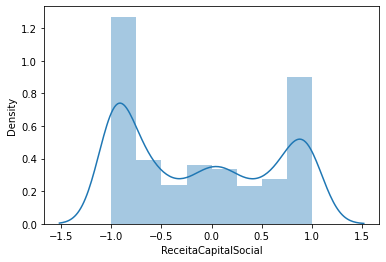

In [47]:
sns.distplot(np.cos(df_final['ReceitaCapitalSocial']))

C:\Users\rafae\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ReceitaCapitalSocial', ylabel='Density'>

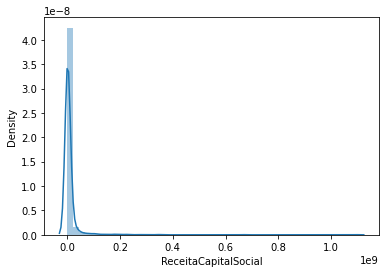

In [45]:
sns.distplot(df_final['ReceitaCapitalSocial'])

In [44]:
aux_df

,UfEndereco,ReceitaAbertura,ReceitaNaturezaJuridica,ReceitaSituacaoEspecial,ReceitaCapitalSocial,OpcaoTributaria,Porte,ReceitaAtividade,cnpj,Faturamento,Funcionarios,TotalProtesto,ValorProtesto,result
0,9.0,8,4,0.0,3,4.0,3,81.0,19211781000191,4.0,3.0,95,3,1.0
1,9.0,24,4,0.0,2,0.0,2,30.0,01978934000165,2.0,3.0,44,3,1.0
2,1.0,3,4,0.0,2,0.0,2,138.0,30866312000143,2.0,3.0,0,0,1.0
3,1.0,9,2,0.0,3,2.0,3,187.0,06337280000457,8.0,3.0,1,2,0.0
4,1.0,47,7,0.0,3,0.0,3,59.0,76102839000100,7.0,5.0,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,9.0,21,7,0.0,3,2.0,1,38.0,04908287000103,0.0,0.0,9,3,1.0
1423,9.0,28,2,0.0,4,2.0,3,20.0,73367575000110,0.0,0.0,0,0,0.0
1424,9.0,21,7,0.0,3,2.0,3,171.0,03591919000195,0.0,0.0,27,3,1.0
1425,9.0,11,7,0.0,3,0.0,3,0.0,11619817000169,0.0,0.0,245,3,0.0


In [70]:

# total_class = df_final['result'].value_counts()
# idx_drop = df_final[df_final['result'] == 0].sample(n=total_class[0.0] - total_class[1.0] ).index
# df_final = df_final.drop(index = idx_drop).reset_index(drop = True)

X = df_final.drop(columns = ['cnpj','result'])
# X['ReceitaCapitalSocial'] = X['ReceitaCapitalSocial'].fillna(0)
y = df_final['result']

In [71]:
X.columns

Index(['UfEndereco', 'ReceitaAbertura', 'ReceitaNaturezaJuridica',
       'ReceitaSituacaoEspecial', 'ReceitaCapitalSocial', 'OpcaoTributaria',
       'Porte', 'ReceitaAtividade', 'Faturamento', 'Funcionarios',
       'TotalProtesto', 'ValorProtesto'],
      dtype='object')

In [72]:
# X = X.rename({
# 'UfEndereco':"feature.0",
# 'ReceitaAbertura':"feature.1",
# 'ReceitaNaturezaJuridica':"feature.2",
# 'ReceitaSituacaoEspecial':"feature.3",
# 'ReceitaCapitalSocial':"feature.4",
# 'OpcaoTributaria':"feature.5",
# 'Porte':"feature.6",
# 'ReceitaAtividade':"feature.7",
# 'Faturamento':"feature.8",
# 'Funcionarios':"feature.9",
# 'TotalProtesto':"feature.10",
# 'ValorProtesto':"feature.11",
# }, axis='columns')

In [73]:
X.columns

Index(['UfEndereco', 'ReceitaAbertura', 'ReceitaNaturezaJuridica',
       'ReceitaSituacaoEspecial', 'ReceitaCapitalSocial', 'OpcaoTributaria',
       'Porte', 'ReceitaAtividade', 'Faturamento', 'Funcionarios',
       'TotalProtesto', 'ValorProtesto'],
      dtype='object')

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature.0   1427 non-null   float64
 1   feature.1   1427 non-null   int64  
 2   feature.2   1427 non-null   int64  
 3   feature.3   1427 non-null   float64
 4   feature.4   1427 non-null   float64
 5   feature.5   1427 non-null   float64
 6   feature.6   1427 non-null   int64  
 7   feature.7   1427 non-null   float64
 8   feature.8   1427 non-null   float64
 9   feature.9   1427 non-null   float64
 10  feature.10  1427 non-null   int32  
 11  feature.11  1427 non-null   float64
dtypes: float64(8), int32(1), int64(3)
memory usage: 128.3 KB


In [153]:
(7*0.3)*6

12.600000000000001

In [76]:
import numpy as np
import itertools
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from hyperactive import Hyperactive

columns_cut = ['ReceitaCapitalSocial','ValorProtesto']
def get_feature_list(opt):
    feature_list = {}
    for key in opt.keys():
        if key in ['random_state','test_size','max_depth','ReceitaCapitalSocial_cut','ValorProtesto_cut']:
            continue
            
        if opt[key] is False:
            continue
        else:
            if opt[key] is True:
                feature = X[key]
            else:
                feature = opt[key](X[key])
                
            if key in columns_cut:
                if opt[key+'_cut'] > 0:
                    try:
                        feature = pd.cut(feature, opt[key+'_cut'], labels=False)
                    except:
                        print('X: ', key+'_cut ->', opt[key])
            
        feature_list[key] = feature

            

    return pd.DataFrame(feature_list)


def model(opt):
    X_new = get_feature_list(opt)

    xgb = RandomForestClassifier(
        max_depth=opt["max_depth"],
    )
    
    scores = cross_val_score(xgb, X_new, y, cv=7)
    score = scores.mean()

    return score


# features can be used (True), not used (False) or transformed for training
features_search_space = [
    True,
    False,
    np.log1p,
    np.square,
    np.sqrt,
    np.sin,
    np.cos,
]


search_space = {
    "random_state": list(range(0, 5000)),
    "test_size": [0.25,0.2,0.3],
    "max_depth": list(range(3, 55)),
    'ReceitaCapitalSocial_cut':[0,3,5,7,11],
    'ValorProtesto_cut':[0,3,5,7,11]
    
}   
    
for c in X.columns:
    search_space[c] = features_search_space
    

#     "feature.0": features_search_space,
#     "feature.1": features_search_space,
#     "feature.2": features_search_space,
#     "feature.3": features_search_space,
#     "feature.4": features_search_space,
#     "feature.5": features_search_space,
#     "feature.6": features_search_space,
#     "feature.7": features_search_space,
#     "feature.8": features_search_space,
#     "feature.9": features_search_space,
#     "feature.10": features_search_space,
#     "feature.11": features_search_space,
# }


hyper = Hyperactive()
hyper.add_search(model, search_space, n_iter=100)
hyper.run()

model:   1%| | 1/100 [00:02<04:08,  2.51s/it, best_iter=0, best_pos=[1721    2   45    3    4    1    0    5    3    6 C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:   3%| | 3/100 [00:04<03:25,  2.12s/it, best_iter=0, best_pos=[1721    2   45    3    4    1    0    5    3    6 C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:   5%| | 5/100 [00:07<02:51,  1.80s/it, best_iter=0, best_pos=[1721    2   45    3    4    1    0    5    3    6 C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  11%| | 11/100 [00:17<02:54,  1.96s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  14%|▏| 14/100 [00:19<02:17,  1.59s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  21%|▏| 21/100 [00:29<02:26,  1.85s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  26%|▎| 26/100 [00:38<02:21,  1.92s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  31%|▎| 31/100 [00:46<02:07,  1.85s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  39%|▍| 39/100 [00:59<02:00,  1.97s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  43%|▍| 43/100 [01:06<01:55,  2.02s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  47%|▍| 47/100 [01:12<01:37,  1.85s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  54%|▌| 54/100 [01:25<01:35,  2.07s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  57%|▌| 57/100 [01:29<01:19,  1.85s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  59%|▌| 59/100 [01:31<01:04,  1.57s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  68%|▋| 68/100 [01:46<01:05,  2.05s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  71%|▋| 71/100 [01:46<00:41,  1.45s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

model:  78%|▊| 78/100 [01:53<00:27,  1.25s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l

model:  89%|▉| 89/100 [02:13<00:22,  2.01s/it, best_iter=7, best_pos=[4999    0    0    4    4    0    6    6    0    0C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rafae\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\rafae\anaconda3\l


Results: 'model'  
   Best score: 0.7301955264864567  
   Best parameter:
      'random_state'             : 4999  
      'test_size'                : 0.25  
      'max_depth'                : 3  
      'ReceitaCapitalSocial_cut' : 11  
      'ValorProtesto_cut'        : 11  
      'UfEndereco'               : True  
      'ReceitaAbertura'          : <ufunc 'cos'>  
      'ReceitaNaturezaJuridica'  : <ufunc 'cos'>  
      'ReceitaSituacaoEspecial'  : True  
      'ReceitaCapitalSocial'     : True  
      'OpcaoTributaria'          : True  
      'Porte'                    : <ufunc 'cos'>  
      'ReceitaAtividade'         : <ufunc 'cos'>  
      'Faturamento'              : True  
      'Funcionarios'             : True  
      'TotalProtesto'            : <ufunc 'cos'>  
      'ValorProtesto'            : <ufunc 'cos'>  
 
   Evaluation time   : 154.25050330162048 sec    [99.94 %]
   Optimization time : 0.0922544002532959 sec    [0.06 %]
   Iteration time    : 154.34275770187378 sec

In [99]:
X['ReceitaAbertura'].value_counts()

55     63
27     62
23     59
19     53
24     52
       ..
70      1
79      1
86      1
2       1
104     1
Name: ReceitaAbertura, Length: 62, dtype: int64

In [100]:
df

,BUSCA,Nome,UfEndereco,ReceitaSituacao,ReceitaAbertura,ReceitaNaturezaJuridica,ReceitaSituacaoEspecial,ReceitaCapitalSocial,OpcaoTributaria,Porte,ReceitaAtividade,cnpj,Faturamento,Funcionarios,TotalProtesto,ValorProtesto,result
0,19211781000191,INDUSTRIA DE PALMILHAS NINIVER EIRELI,4.0,ATIVA,8,6,0.0,350000.00,3.0,3,233.0,19211781000191,4.0,3.0,95,427011.82,1.0
1,01978934000165,POLYMER INDUSTRIA E COMERCIO DE PLASTICOS EIRELI,4.0,ATIVA,24,6,0.0,200000.00,0.0,1,280.0,01978934000165,2.0,3.0,44,2241679.36,1.0
2,30866312000143,FEX COMERCIO DE FERRO EIRELI,14.0,ATIVA,3,6,0.0,100000.00,0.0,1,215.0,30866312000143,2.0,3.0,0,0.00,1.0
3,06337280000457,FRESNOMAQ INDUSTRIA DE MAQUINAS S/A,14.0,ATIVA,9,2,0.0,6702900.00,1.0,3,147.0,06337280000457,8.0,3.0,1,5069.19,0.0
4,76102839000100,AVIC DISTRIBUIDORA DE ACUMULADORES LTDA,14.0,ATIVA,47,10,0.0,3740000.00,0.0,3,124.0,76102839000100,7.0,5.0,-1,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,87455432000175,COOPERATIVA SUL RIO GRANDENSE DE LATICINIOS LT...,4.0,ATIVA,48,12,0.0,NaN,1.0,3,217.0,87455432000175,0.0,0.0,1413,6975885.19,0.0
1520,73367575000110,THOMAS KL INDUSTRIA DE ALTO FALANTES SA,4.0,ATIVA,28,2,0.0,33418134.97,1.0,3,306.0,73367575000110,0.0,0.0,0,0.00,0.0
1521,03591919000195,"DI CANALLI COMERCIO, TRANSPORTES E EMPREENDIME...",4.0,ATIVA,21,10,0.0,1605215.00,1.0,3,191.0,03591919000195,0.0,0.0,27,248716.66,1.0
1522,11619817000169,COMERCIO DE CARNES SELBACH LTDA,4.0,BAIXADA,11,10,0.0,300000.00,0.0,3,0.0,11619817000169,0.0,0.0,245,4648997.75,0.0


In [101]:
hyper.best_para(model)

{'random_state': 4999,
 'test_size': 0.25,
 'max_depth': 3,
 'ReceitaCapitalSocial_cut': 11,
 'ValorProtesto_cut': 11,
 'UfEndereco': True,
 'ReceitaAbertura': <ufunc 'cos'>,
 'ReceitaNaturezaJuridica': <ufunc 'cos'>,
 'ReceitaSituacaoEspecial': True,
 'ReceitaCapitalSocial': True,
 'OpcaoTributaria': True,
 'Porte': <ufunc 'cos'>,
 'ReceitaAtividade': <ufunc 'cos'>,
 'Faturamento': True,
 'Funcionarios': True,
 'TotalProtesto': <ufunc 'cos'>,
 'ValorProtesto': <ufunc 'cos'>}

In [97]:
opt = hyper.best_para(model)


feature_list = get_feature_list(opt)
X_new = feature_list[['ReceitaAtividade','Faturamento','TotalProtesto','ValorProtesto']]

gbr = RandomForestClassifier(
    max_depth=opt['max_depth'],
)


X_train, X_test, y_train, y_test = train_test_split(feature_list, y, test_size= opt['test_size'], random_state=opt['random_state'])

gbr.fit(X_train, y_train)
y_result = gbr.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(y_test, y_result))
print(precision_score(y_test, y_result))
print(recall_score(y_test, y_result))

0.7394957983193278
0.7727272727272727
0.1619047619047619


In [118]:
feature_list

,UfEndereco,ReceitaAbertura,ReceitaNaturezaJuridica,ReceitaSituacaoEspecial,ReceitaCapitalSocial,OpcaoTributaria,Porte,ReceitaAtividade,Faturamento,Funcionarios,TotalProtesto,ValorProtesto
0,9.0,-0.145500,4,0.0,6,4.0,-0.989992,81.0,4.0,3.0,95,0.965526
1,9.0,0.424179,4,0.0,10,0.0,-0.416147,30.0,2.0,3.0,44,-0.592710
2,1.0,-0.989992,4,0.0,0,0.0,-0.416147,138.0,2.0,3.0,0,1.000000
3,1.0,-0.911130,2,0.0,2,2.0,-0.989992,187.0,8.0,3.0,1,0.228224
4,1.0,-0.992335,7,0.0,0,0.0,-0.989992,59.0,7.0,5.0,-1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1422,9.0,-0.547729,7,0.0,10,2.0,0.540302,38.0,0.0,0.0,9,0.986762
1423,9.0,-0.962606,2,0.0,1,2.0,-0.989992,20.0,0.0,0.0,0,1.000000
1424,9.0,-0.547729,7,0.0,9,2.0,-0.989992,171.0,0.0,0.0,27,-0.996061
1425,9.0,0.004426,7,0.0,0,0.0,-0.989992,0.0,0.0,0.0,245,0.984931


In [86]:
feature_list['result'] = y

In [87]:
import association_metrics as am
aux_df_ = feature_list.astype('category')
cramersv = am.CramersV(aux_df_) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
v_cra = cramersv.fit()

In [89]:
v_cra

,UfEndereco,ReceitaAbertura,ReceitaNaturezaJuridica,ReceitaSituacaoEspecial,ReceitaCapitalSocial,OpcaoTributaria,Porte,ReceitaAtividade,Faturamento,Funcionarios,TotalProtesto,ValorProtesto,result
UfEndereco,1.000000,0.194381,0.174436,0.049442,0.046975,0.153845,0.324284,0.408867,0.175531,0.223664,0.166900,0.077229,0.148094
ReceitaAbertura,0.194381,1.000000,0.354673,0.226920,0.267983,0.335156,0.321115,0.521789,0.278654,0.235001,0.362035,0.200405,0.222258
ReceitaNaturezaJuridica,0.174436,0.354673,1.000000,0.272520,0.183935,0.151858,0.250855,0.563978,0.231006,0.135749,0.438990,0.120295,0.152129
ReceitaSituacaoEspecial,0.049442,0.226920,0.272520,1.000000,0.011912,0.064857,0.063152,0.689952,0.116798,0.138635,0.721045,0.177081,0.177934
ReceitaCapitalSocial,0.046975,0.267983,0.183935,0.011912,1.000000,0.080350,0.068257,0.611513,0.238626,0.072958,0.512059,0.125917,0.043122
OpcaoTributaria,0.153845,0.335156,0.151858,0.064857,0.080350,1.000000,0.408778,0.549243,0.201035,0.207189,0.400036,0.103846,0.134174
Porte,0.324284,0.321115,0.250855,0.063152,0.068257,0.408778,1.000000,0.570516,0.570594,0.425729,0.465946,0.114480,0.109116
ReceitaAtividade,0.408867,0.521789,0.563978,0.689952,0.611513,0.549243,0.570516,1.000000,0.574240,0.569014,0.481925,0.534821,0.522963
Faturamento,0.175531,0.278654,0.231006,0.116798,0.238626,0.201035,0.570594,0.574240,1.000000,0.608314,0.444495,0.125398,0.205539
Funcionarios,0.223664,0.235001,0.135749,0.138635,0.072958,0.207189,0.425729,0.569014,0.608314,1.000000,0.449639,0.127587,0.176530


<AxesSubplot:>

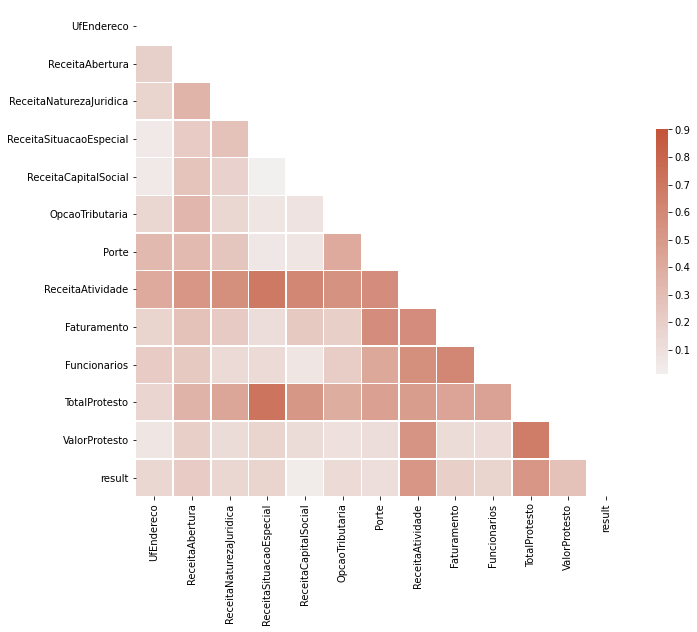

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(v_cra, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(v_cra, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

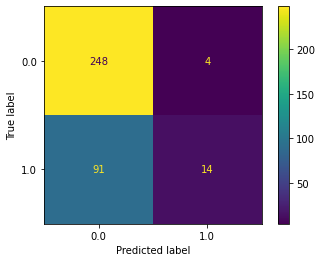

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_result)
plot_confusion_matrix(gbr, X_test, y_test)  
# plt.show()  

In [148]:
80+25

105

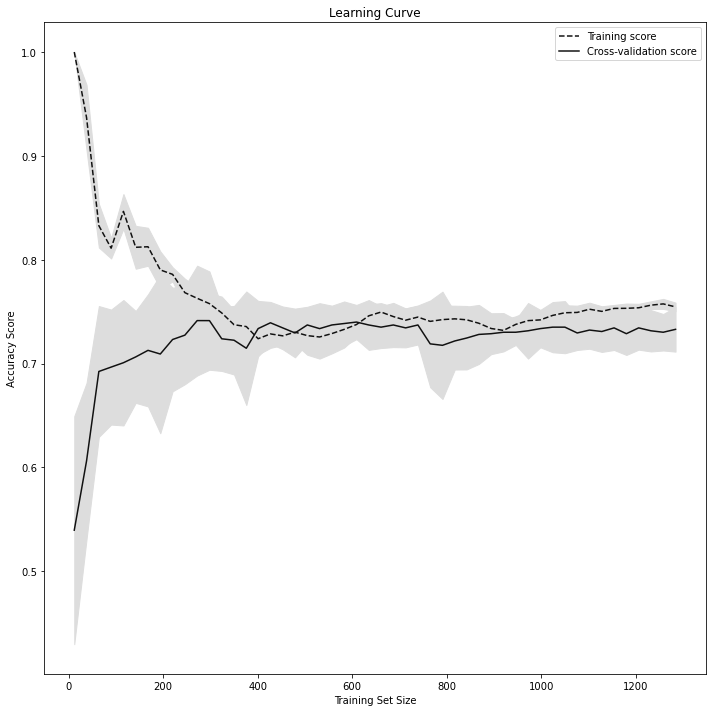

In [102]:
import matplotlib.pyplot as plt
train_sizes,train_scores, test_scores = learning_curve(RandomForestClassifier(max_depth=opt['max_depth']),\
                                                       feature_list, y,cv=10,scoring='accuracy',n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [103]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X_test)

0       233.0
1       280.0
2       215.0
3       147.0
4       124.0
        ...  
1519    217.0
1520    306.0
1521    191.0
1522      0.0
1523      1.0
Name: ReceitaAtividade, Length: 1524, dtype: float64

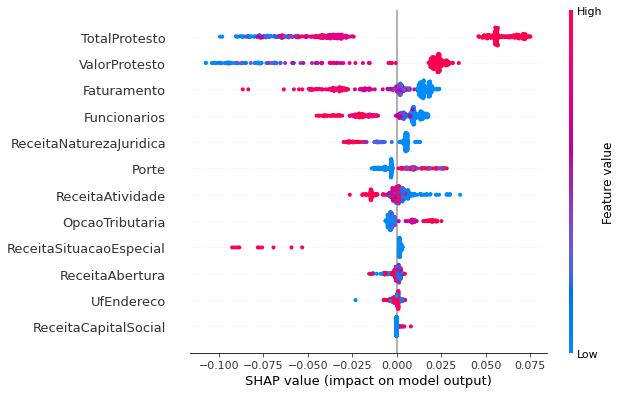

In [108]:
shap.summary_plot(shap_values[0], X_test)

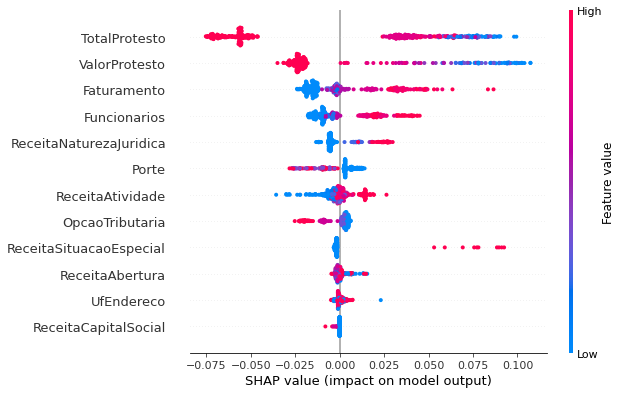

In [107]:
shap.summary_plot(shap_values[1], X_test)

In [ ]:
'UfEndereco':"feature.0",
'ReceitaAbertura':"feature.1",
'ReceitaNaturezaJuridica':"feature.2",
'ReceitaSituacaoEspecial':"feature.3",
'ReceitaCapitalSocial':"feature.4",
'OpcaoTributaria':"feature.5",
'Porte':"feature.6",
'ReceitaAtividade':"feature.7",
'Faturamento':"feature.8",
'Funcionarios':"feature.9",
'TotalProtesto':"feature.10",
'ValorProtesto':"feature.11",

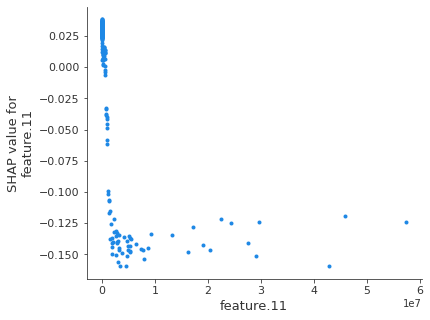

None

In [82]:
display(shap.dependence_plot('feature.11', shap_values[0], X_test, interaction_index = None))

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


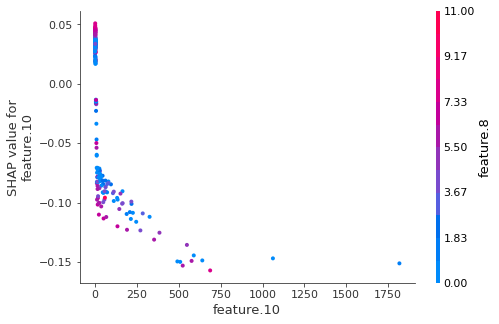

In [94]:
shap.dependence_plot(10, shap_values[0], X_test)

In [270]:
gbr.score(X_test, y_test)

0.70625

In [283]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_result, pos_label=0)
metrics.auc(fpr, tpr)

0.4328208220279369